
















































































































































































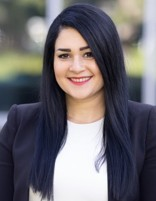



---


---


### Project Title: FoodHub Data Analysis
### Prepared by: Sona Shakoory
### Program: MIT Professional Education – Applied Data Science
### Module: Project Foundations for Data Science

---


---




### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information



---


Lets start by importing the required libraries

---



In [ ]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---


The next step is to examine the data structure. The Excel file has been saved in my Google Drive under the "Python Course" folder.


---







---


**1.** How many rows and columns are present in the data?


---





In [ ]:
# readind the data
df = pd.read_excel('/content/drive/MyDrive/Python Course/foodhub_order.xlsx')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [ ]:
# returns the total # of rows and columns in the dataset
df.shape

(1898, 9)



---


**2.** What are the datatypes of the different columns in the dataset?


---



In [ ]:
# Prints a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB




---


**3.** Are there any missing values in the data? If yes, treat them using an appropriate method


---



In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


Observations:

---



*     The Dataframe has a total of one column of float64 datatype, four columns of int64 datatypes, and four columns of object datatypes
*     No missing values are present in the dataset.

---


In [ ]:
# Group by restaurant_name and count 'Not given' ratings
no_rating_rest = df.groupby('restaurant_name')['rating'].apply(lambda x: (x == 'Not given').sum()).sort_values(ascending = False).reset_index()

no_rating_rest.columns = ['restaurant_name', 'no_rating#']

# Filter restaurants with 'Not given' ratings
no_rating_rest = no_rating_rest[no_rating_rest['no_rating#'] > 0]

print(no_rating_rest)

               restaurant_name  no_rating#
0                  Shake Shack          86
1            The Meatball Shop          48
2            Blue Ribbon Sushi          46
3    Blue Ribbon Fried Chicken          32
4                         Parm          29
..                         ...         ...
129  Pinto Nouveau Thai Bistro           1
130               Olive Garden           1
131                 Mira Sushi           1
132             Paul & Jimmy's           1
133                   Kanoyama           1

[134 rows x 2 columns]


In [ ]:
# Group by restaurant_name and count total ratings
total_ratings = df.groupby('restaurant_name')['rating'].count().reset_index()
total_ratings.columns = ['restaurant_name', 'total_ratings']

In [ ]:
# Group by restaurant_name and count 'Not given' ratings
not_rated = df.groupby('restaurant_name')['rating'].apply(lambda x: (x == 'Not given').sum()).reset_index()
not_rated.columns = ['restaurant_name', 'not_rated']

# Merge dataframes
ratings_summary = pd.merge(total_ratings, not_rated, on='restaurant_name')

# Filter restaurants where total_ratings equals not_rated
only_not_rated = ratings_summary[ratings_summary['total_ratings'] == ratings_summary['not_rated']]

only_not_rated_names =only_not_rated['restaurant_name'].tolist()

filtered_df = df[df['restaurant_name'].isin(only_not_rated_names)]

print(filtered_df['restaurant_name'])

0                               Hangawi
10      Big Wong Restaurant ÂŒ_Â¤Â¾Ã‘Â¼
50                             Bistango
249                            Bistango
260        Tarallucci e Vino Restaurant
365                        Room Service
432        Tarallucci e Vino Restaurant
455                  Friend of a Farmer
464                             Hangawi
486                               Posto
512                          Spice Thai
516                        Room Service
574                   Gaia Italian Cafe
619                           Rohm Thai
680                             Alidoro
877                           La Follia
1003                             Aurora
1030                  Crema Restaurante
1063                             Aurora
1193                       Market Table
1274                       Room Service
1460                      Lamarca Pasta
1517                     Paul & Jimmy's
1604                 Friend of a Farmer
1673                     Coppola's East


Observations:

---



*   The DataFrame contains 9 columns and 1,898 rows, consistent with the Data Dictionary.
*   Each row represents a customer order transaction.
*   Order IDs and Customer IDs are unique across both head and tail, as expected for transactional data.
*   Ratings appear in two formats: numeric (0–5) and "Not given".
*   Repeated entries for restaurants like Blue Ribbon Sushi indicate customer loyalty or high popularity.
*   Out of 178 unique restaurants, 134 have at least one unrated entry.

*   Shake Shack has the most 'Not given' ratings (86), followed by The Meatball Shop (48) and Blue Ribbon Sushi (46).

*   Fewer than 30 restaurants have no ratings recorded at all.

*   Given the relatively small proportion of 'Not given' entries, it's reasonable to retain them in the main dataset.

*   For deeper rating analysis, a new DataFrame filtered_ratings will be created to include only numerical ratings.


---



In [ ]:
# Filtering dataFrame to exclude 'Not given' ratings
filtered_ratings = df[df['rating'] != 'Not given'].copy()

# Convert the 'rating' column to integers
filtered_ratings['rating'] = filtered_ratings['rating'].astype(int)

filtered_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB




---


**4.**Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?


---



In [ ]:
#Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


Observations:


---


*   Food preparation time ranges from 20 to 35 minutes, with an average of ~27.37 minutes.

*   Delivery time is primarily distributed between 20 and 28 minutes.

*   The average delivery time is 24.16 minutes with a standard deviation of 4.97 minutes.


---





---


**5.**How many orders are not rated?


---



In [ ]:
result = df[df['rating'] == 'Not given']
print(result.shape)

(736, 9)




---


Orders with the rating "Not given" are considered unrated. By filtering these entries into a new DataFrame result, we find that 736 rows correspond to unrated orders. Therefore, 736 orders in the dataset are not rated.


---



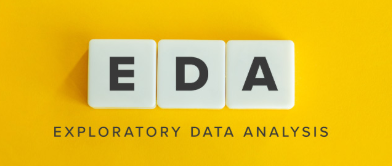



---


**6.**Explore all the variables and provide observations on their distributions.


---



In [ ]:
# Checking for unique order IDs
unique_orders = df['order_id'].nunique()

# Checking for unique customer IDs
unique_customers = df['customer_id'].nunique()

# Checking for unique restaurants
unique_restaurants = df['restaurant_name'].nunique()

print(unique_orders, 'distinct orders')
print(unique_customers, 'distinct customers')
print(unique_restaurants, 'distinct restaurants')

1898 distinct orders
1200 distinct customers
178 distinct restaurants


Observations:


---

*   The dataset includes 1,898 distinct orders, 1,200 unique customer IDs, and 178 distinct restaurants.

*   The lower count of unique customers compared to total orders indicates that customers have placed multiple orders.

---



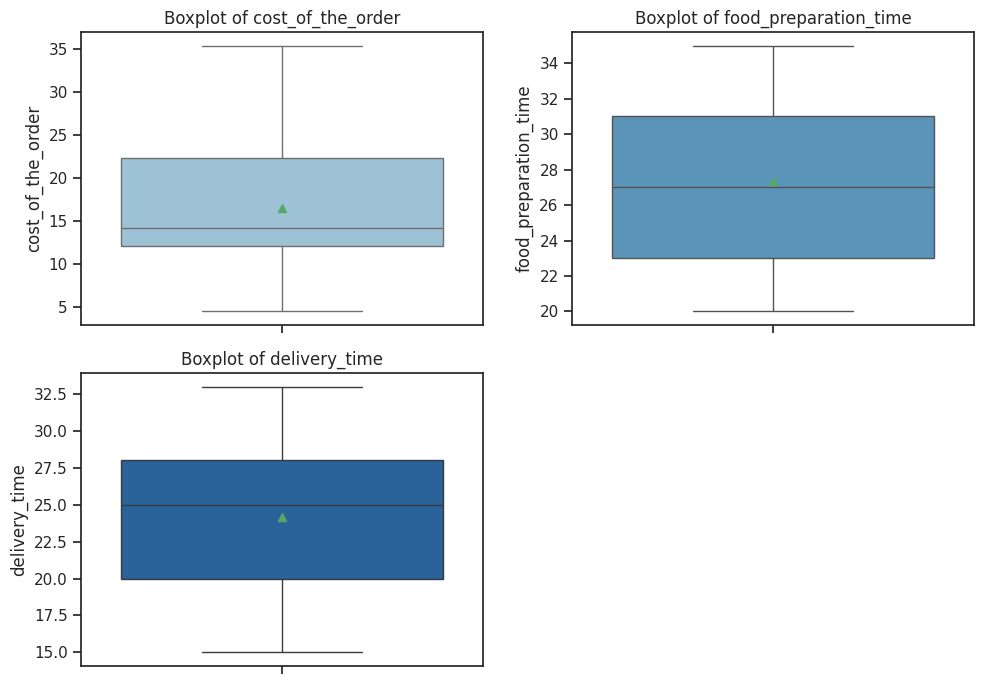

In [ ]:
sns.set(style="ticks")

# Numerical columns
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Color Gradiant for plots
colors = sns.color_palette("Blues", n_colors=len(numerical_columns) + 1)[1:]

# Boxplots for numerical columns
plt.figure(figsize=(10, 7))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column], color=colors[i - 1], showmeans=True)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Observations:


---


*   75% of orders are:

    1) Prepared in ≤31 minutes

    2) Delivered in ≤28 minutes

    3) Priced under $25

*   The median values for food preparation time and cost are lower than their respective means, indicating positive skewness.

*   The median delivery time is higher than the mean, suggesting a left-skewed distribution.

*   Skewness in prep time and cost likely reflects the presence of outliers or high-value orders that raise the average.

*   For delivery time, the distribution suggests generally prompt service with occasional delays extending the mean.


---



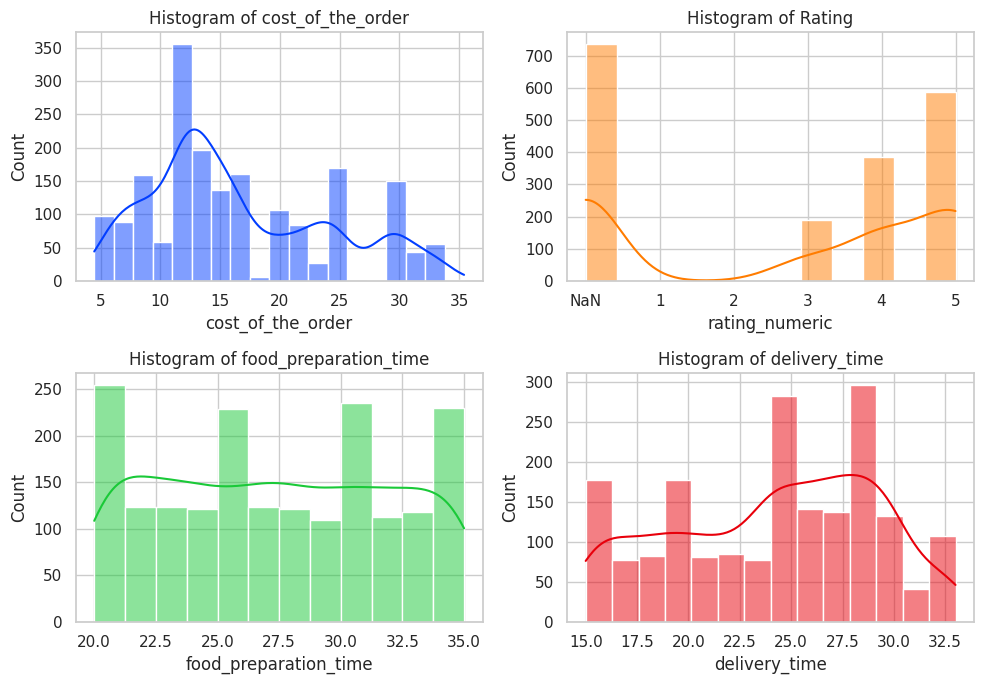

In [ ]:
# Convert 'rating' to numeric, coercing 'Not given' to NaN, then replace NaNs with 0 for visualization
df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0)

# Define updated list of columns for plotting
numerical_columns = ['cost_of_the_order', 'rating_numeric', 'food_preparation_time', 'delivery_time']
colors = sns.color_palette("bright", n_colors=len(numerical_columns))

# Set plot style
sns.set(style="whitegrid")

# Plot histograms with actual data
plt.figure(figsize=(10, 7))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=df[column], color=colors[i - 1], kde=True)
    if column == 'rating_numeric':
        plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['NaN', '1', '2', '3', '4', '5'])
        plt.title('Histogram of Rating')
    else:
        plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

Observations:


---


**Order Cost:**

*   Distribution is right-skewed, with most orders priced between 10-17 Dollars

*   Few outliers exceed $30.

**Delivery Time:**

*   Slightly left-skewed distribution.

*   Majority of deliveries occur between 25–28 minutes.

*   Faster deliveries (15–20 min) are less common; few exceed 30 minutes.

**Food Preparation Time:**

*   Distribution is relatively uniform, but with spikes around 20, 26, 31, and 34 minutes, suggesting common prep benchmarks.


---



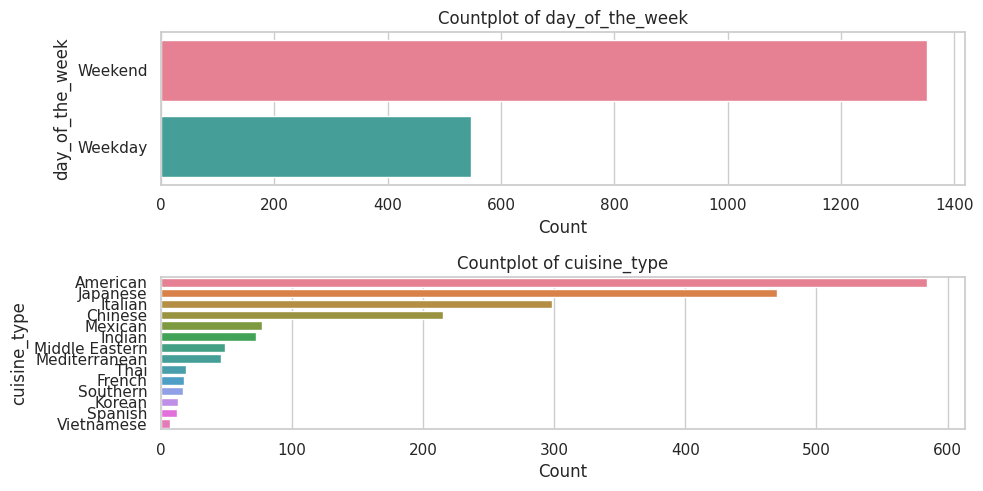

In [ ]:
# Categorical columns
categorical_columns = ['day_of_the_week', 'cuisine_type']

# Countplots for categorical columns
plt.figure(figsize=(10, 7))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index, palette="husl")
    plt.title(f'Countplot of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()



---


**7.**Which are the top 5 restaurants in terms of the number of orders received?


---



In [ ]:
print('Top 5 Restaurants:\n')
# Number of orders for each restaurant
restaurant_counts = df['restaurant_name'].value_counts()

# Top 5 restaurants
top_5_restaurants = restaurant_counts.head(5)
print(top_5_restaurants)

Top 5 Restaurants:

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


Observations:


---


**Order Timing:**

*    Over 50% of orders occur on weekends, suggesting higher customer inclination to order food during weekends compared to weekdays.

**Cuisine Preferences:**

*    The majority of orders are for American, Japanese, and Italian cuisines.

*    Thai, French, Southern, Korean, Spanish, and Vietnamese cuisines represent a small minority of total orders.

**Most ordered-from restaurants**

*    Shake Shack – 219 orders
*    The Meatball Shop – 132 orders
*    Blue Ribbon Sushi – 119 orders
*    Blue Ribbon Fried Chicken – 96 orders
*    Parm – 68 orders


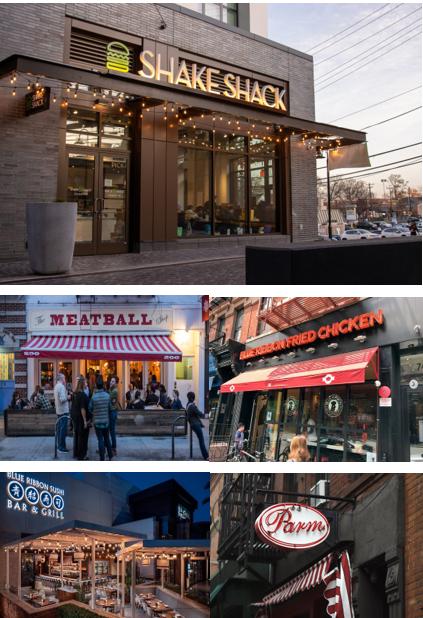


These restaurants show a significantly higher customer preference, suggesting strong brand recognition or popularity.




---


**8.**Which is the most popular cuisine on weekends?


---



In [ ]:
print('Top 5 Cuisines:\n')
# Number of orders on Weekends
weekends = df[df['day_of_the_week'] == 'Weekend']

# Top 5 restaurants on Weekends
cuisines_count = weekends['cuisine_type'].value_counts()
top_5_cuisines = cuisines_count.head(5)
print(top_5_cuisines)

Top 5 Cuisines:

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64


In [ ]:
# Group by cuisine_type and count the number of unique restaurants
cuisine_counts = df.groupby('cuisine_type')['restaurant_name'].nunique().reset_index()

cuisine_counts.columns = ['cuisine_type', 'restaurant_count']

# Sort dataFrame by restaurant_count
cuisine_counts_sorted = cuisine_counts.sort_values('restaurant_count', ascending=False)

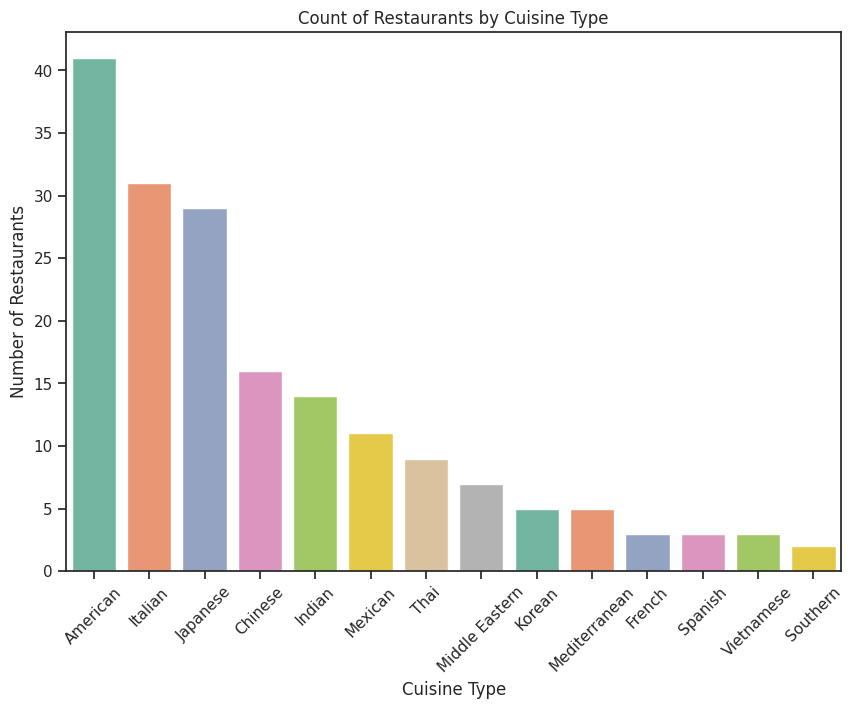

In [ ]:
# Countplot
plt.figure(figsize=(10, 7))
sns.barplot(x='cuisine_type', y='restaurant_count', data=cuisine_counts.sort_values('restaurant_count', ascending=False), hue='cuisine_type', palette='Set2')
plt.title('Count of Restaurants by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

Observations:


---


*    American, Italian, and Japanese restaurants are the most common, aligning with their high order volumes.

*    Cuisines with fewer restaurants tend to be less popular, likely due to limited availability.

*    However, some cuisines outperform their restaurant count—for example, Japanese cuisine receives more orders than Italian, despite having fewer restaurants, indicating higher demand per location.


---



---


**9.**What percentage of the orders cost more than 20 dollars?


---



In [ ]:
# Orders costing more than 20 dollars
more_than_twenty = df[df['cost_of_the_order'] > 20]

print('Number of orders more than 20 dollars:', len(more_than_twenty))

Number of orders more than 20 dollars: 555


In [ ]:
# Calculate percentage
percentage = (len(more_than_twenty) / len(df)) * 100
print('Percentage of orders more than 20 dollars:', str(round(percentage, 2)) + '%')

Percentage of orders more than 20 dollars: 29.24%




---


**10.**What is the mean order delivery time?

---



In [ ]:
# Mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print('Mean delivery time:', round(mean_delivery_time, 2), 'minutes')

Mean delivery time: 24.16 minutes




---


**11.**The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.


---



In [ ]:
print('Most frequent customers:\n')

# Number of customers per unique id
most_frequent_customers = df['customer_id'].value_counts()
print(most_frequent_customers.head(3))

Most frequent customers:

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


Observations:


---


*    Out of 1,898 total orders, 555 orders cost more than $20.

*    This represents approximately 29.24% of all orders, indicating that nearly one-third of customers opted for higher-priced meals.

*   Customer ID 52832 placed the highest number of orders with a total of 13. Customer ID 47440 follows with 10 orders, and Customer ID 83287 ranks third with 9 orders.


---





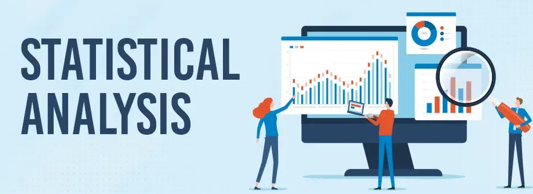



---


**12.** Perform a multivariate analysis to explore relationships between the important variables in the dataset.


---



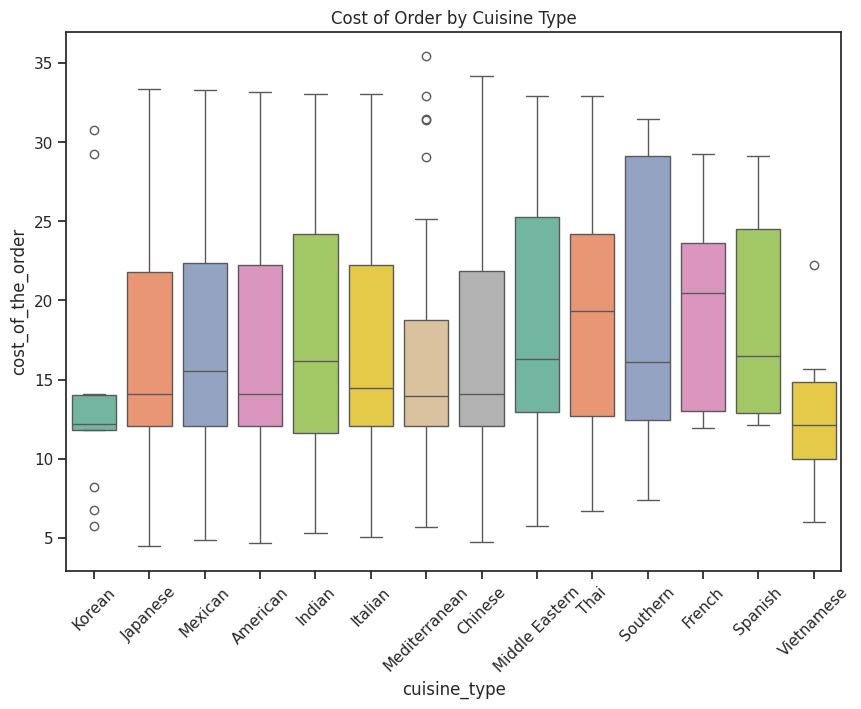

In [ ]:
# Boxplot of Cost by Cuisine Type
plt.figure(figsize=(10, 7))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Cost of Order by Cuisine Type')
plt.show()

Observations:


---


*   Southern cuisine tends to have higher average costs and greater variability compared to other cuisines.

*   Korean and Vietnamese cuisines show lower and more consistent order costs, with minimal spread.

*   Southern, Japanese, Mexican, and Mediterranean cuisines exhibit a notable number of high-cost outliers, indicating occasional premium orders.

*   Southern cuisine has the highest median order cost, while Korean and Vietnamese cuisines have the lowest medians.


---



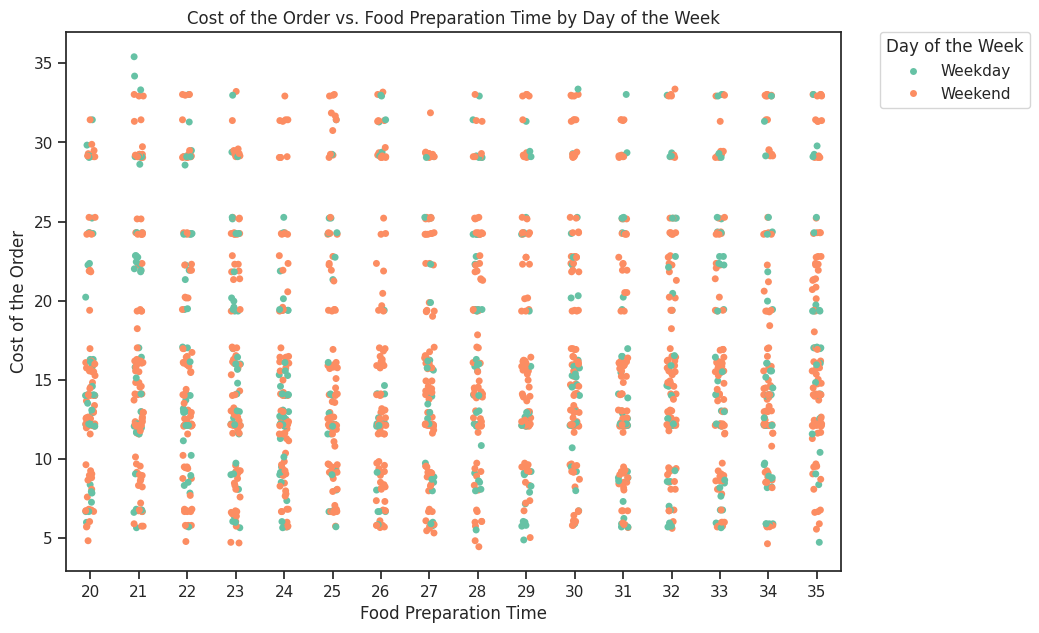

In [ ]:
# Stripplot of Cost vs Food Prep Time, day of week analysis
plt.figure(figsize=(10, 7))
sns.stripplot(x='food_preparation_time', y='cost_of_the_order', hue='day_of_the_week', data=df, palette='Set2')
plt.title('Cost of the Order vs. Food Preparation Time by Day of the Week')
plt.xlabel('Food Preparation Time')
plt.ylabel('Cost of the Order')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Observations:


---


*    The cost of orders is clustered at specific price points, particularly within the 10-25 Dollars range, indicating mid-range pricing is most common.

*    High-cost orders (above 30 Dollars) are infrequent, while low-cost orders (below 10 Dollars) appear occasionally but are less dense.

*    Food preparation time is evenly distributed between 20 and 35 minutes, with no clear clustering, suggesting diverse prep times across restaurants.

*    There is no significant difference in food prep times between weekdays and weekends, indicating consistent operational patterns.


---



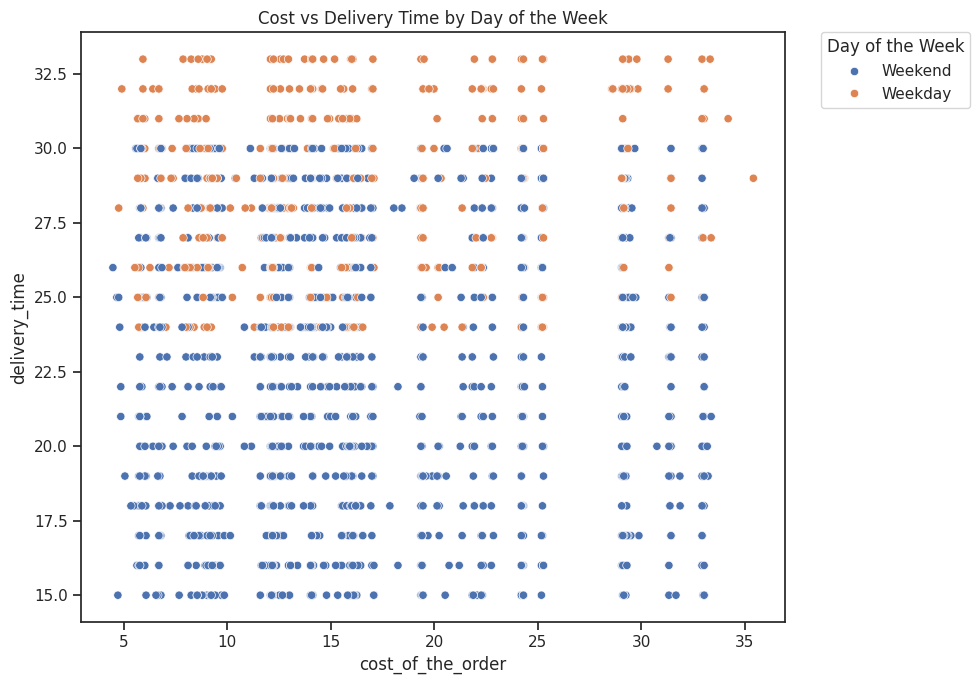

In [ ]:
# Scatter plot of Cost vs Delivery Time, day of week analysis
import textwrap
plt.figure(figsize=(10, 7))
sns.scatterplot(x='cost_of_the_order', y='delivery_time', hue='day_of_the_week', data=df)
plt.title('Cost vs Delivery Time by Day of the Week')
plt.legend(title='Day of the Week',bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

Observations:


---


*    The scatter plot shows costs ranging from ~5 - 35 Dollars and delivery times from ~15 to 32.5 minutes.

*    Cost patterns appear consistent across weekdays and weekends.

*    Delivery times tend to be shorter on weekends (15–30 min) compared to weekdays (24–33 min), suggesting slower delivery on weekdays.

*    There is no clear correlation between order cost and delivery time—both low- and high-cost orders exhibit similar delivery durations.


---



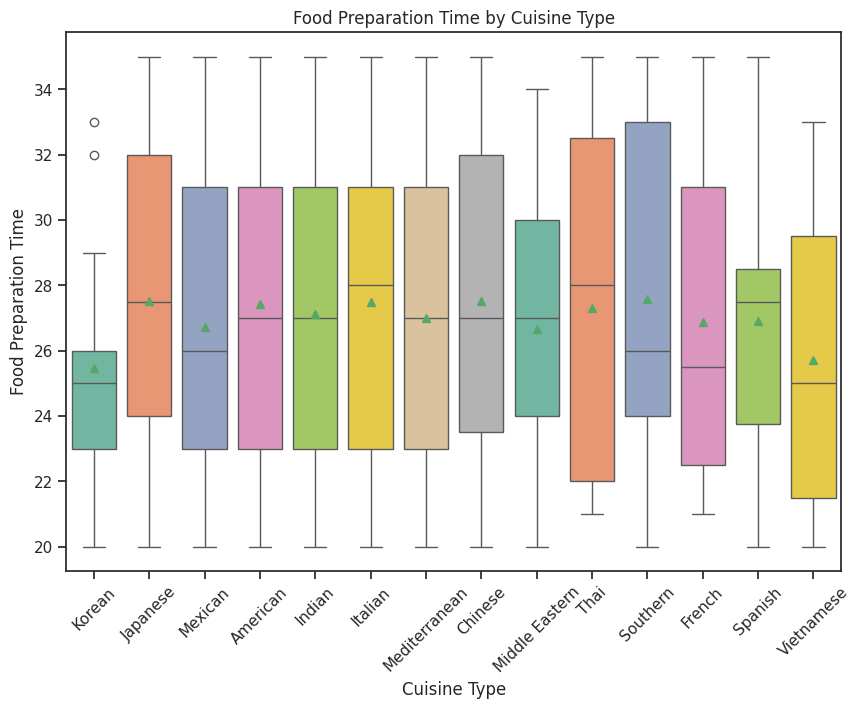

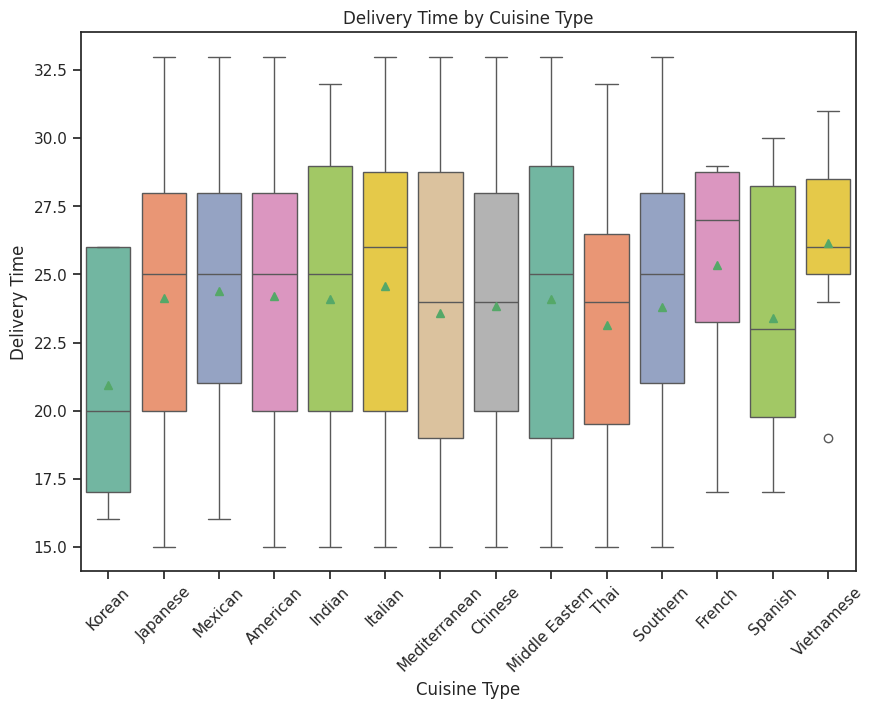

In [ ]:
# Boxplot for Food Preparation Time by Cuisine Type
plt.figure(figsize=(10, 7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, showmeans=True, hue='cuisine_type', palette='Set2')
plt.title('Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Delivery Time by Cuisine Type
plt.figure(figsize=(10, 7))
sns.boxplot(x='cuisine_type', y='delivery_time', data=df, showmeans=True, hue='cuisine_type', palette='Set2')
plt.title('Delivery Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time')
plt.xticks(rotation=45)
plt.show()

Observations:


---


*    For food preparation time, most cuisines have a median between 26–28 minutes, with Korean and Vietnamese cuisines slightly lower at ~25 minutes.

*    Delivery times generally fall between 24–26 minutes, except for Korean cuisine (lower at 20 minutes) and French cuisine (higher at 27 minutes).

*    A right-skewed distribution in food prep time is indicated when the mean exceeds the median, seen in Southern, French, Vietnamese, and Mexican cuisines.

*    Conversely, delivery times tend to be left-skewed, as the mean is often less than the median across most cuisines.

*    Chinese and Mediterranean cuisines exhibit the most consistent timing in both preparation and delivery.

*    Korean, Vietnamese, Spanish, and French cuisines show the greatest variability, often correlating with lower popularity or restaurant frequency.


---



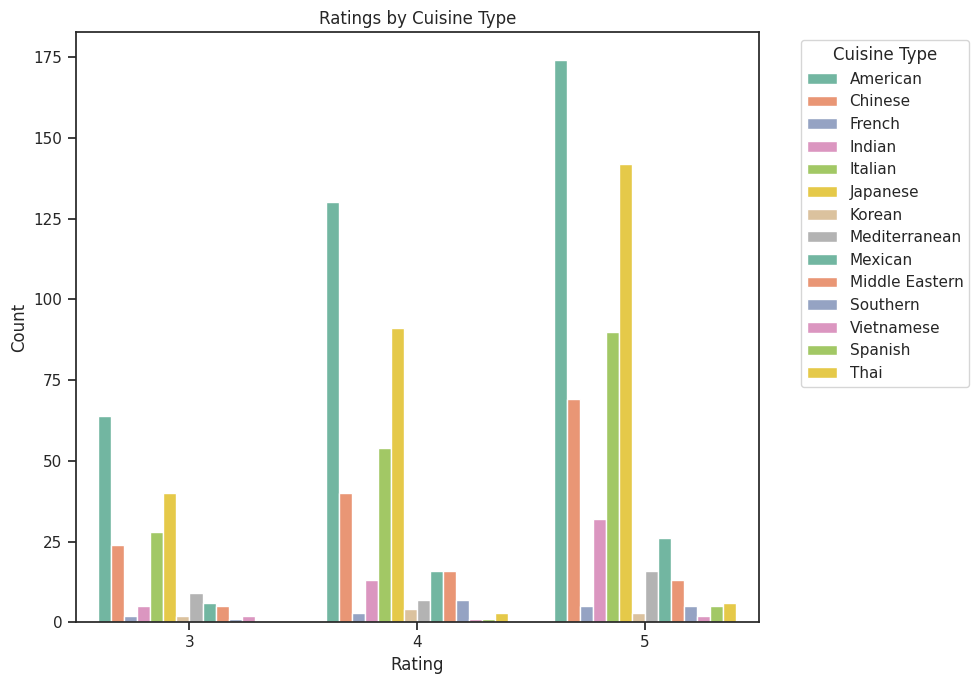

In [ ]:
# Group by cuisine type and rating, and count the occurrences (using filtered_ratings dataframe from Question 3)
cuisine_ratings = filtered_ratings.groupby(['cuisine_type', 'rating']).size().reset_index(name='count')

# Count plot of Rating vs Cuisine Type
plt.figure(figsize=(10, 7))
sns.barplot(data=cuisine_ratings, x='rating', y='count', hue='cuisine_type', dodge=True, palette='Set2')
plt.title('Ratings by Cuisine Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Cuisine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Observations:


---


*    American, Japanese, and Italian cuisines are the most frequent, most rated, and most popular, dominating both the overall rating volume and the 3–4 rating range, reinforcing their widespread customer engagement.

*    Less frequent cuisines are less likely to be rated, likely due to limited exposure.

*    However, when rated, these less common cuisines tend to receive high scores, with most ratings being 5 out of 5, suggesting a positive customer experience despite lower visibility

---



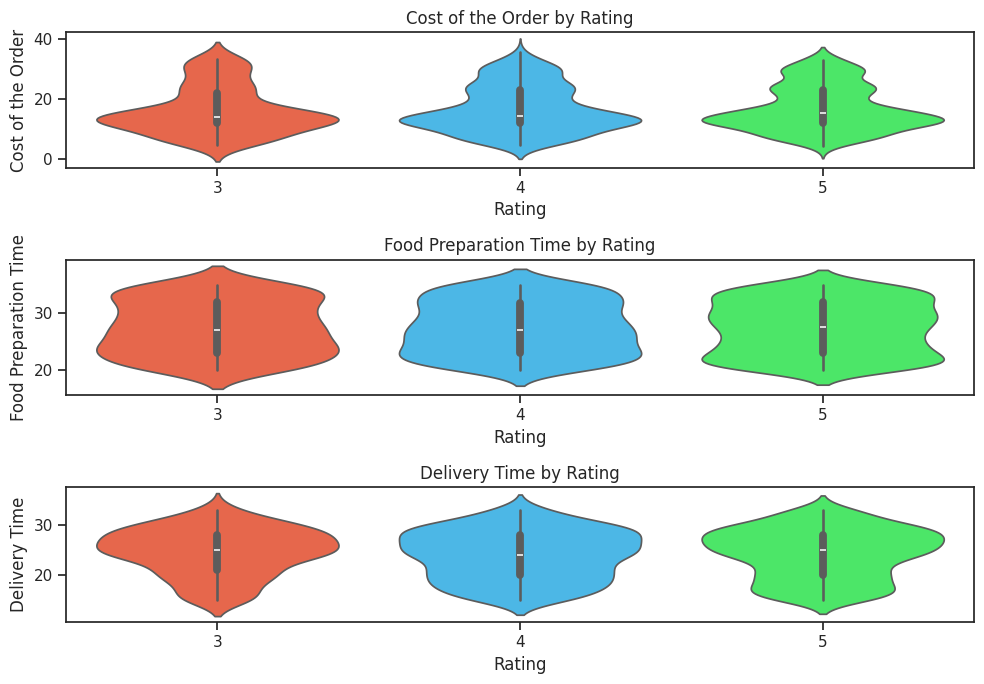

In [ ]:
plt.figure(figsize=(10, 7))

# Using filtered_rating dataframe to exclude not given ratings
# Violin plot for Cost of the Order by Rating
plt.subplot(3, 1, 1)
sns.violinplot(x='rating', y='cost_of_the_order', data=filtered_ratings, palette=['#FF5733', '#33C1FF', '#33FF57'])
plt.title('Cost of the Order by Rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')

# Violin plot for Food Preparation Time by Rating
plt.subplot(3, 1, 2)
sns.violinplot(x='rating', y='food_preparation_time', data=filtered_ratings, palette=['#FF5733', '#33C1FF', '#33FF57'])
plt.title('Food Preparation Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')

# Violin plot for Delivery Time by Rating
plt.subplot(3, 1, 3)
sns.violinplot(x='rating', y='delivery_time', data=filtered_ratings, palette=['#FF5733', '#33C1FF', '#33FF57'])
plt.title('Delivery Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')

plt.tight_layout()
plt.show()

Observations:


---


*    Density patterns by rating (3, 4, 5) are generally similar in shape but vary across different numerical variables.

*    For cost, most ratings are given for orders priced between 10 and 20 Dollars. As cost increases, the density of rating 3 declines, suggesting that higher-cost orders tend to receive more favorable ratings (4 or 5).

*    Food preparation time shows no meaningful variation across ratings, indicating little to no correlation between prep time and customer satisfaction.

*    For delivery time, density peaks for all ratings occur between 25–30 minutes. However, ratings 4 and 5 show higher density at shorter delivery times, implying that faster deliveries may lead to better ratings, while longer times are more associated with neutral (rating 3) responses.


---



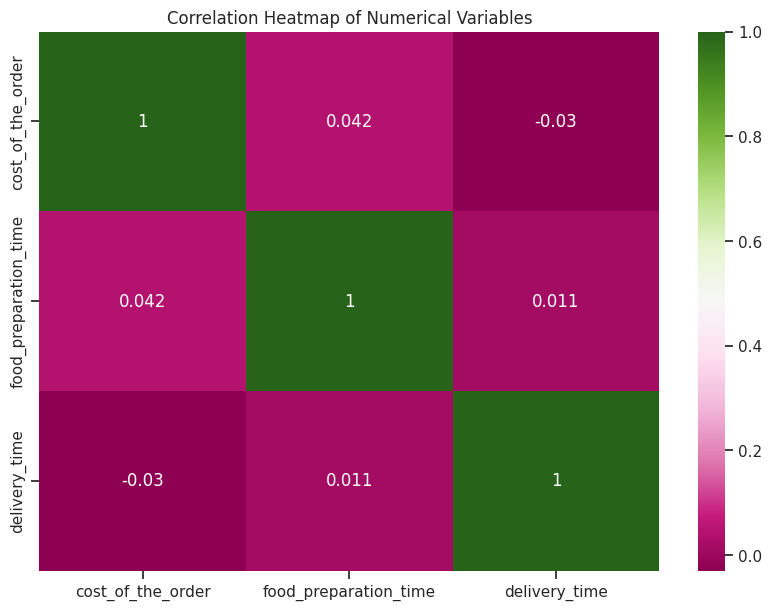

In [ ]:
# Heatmap for correlations between numerical variables
plt.figure(figsize=(10, 7))
sns.heatmap(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

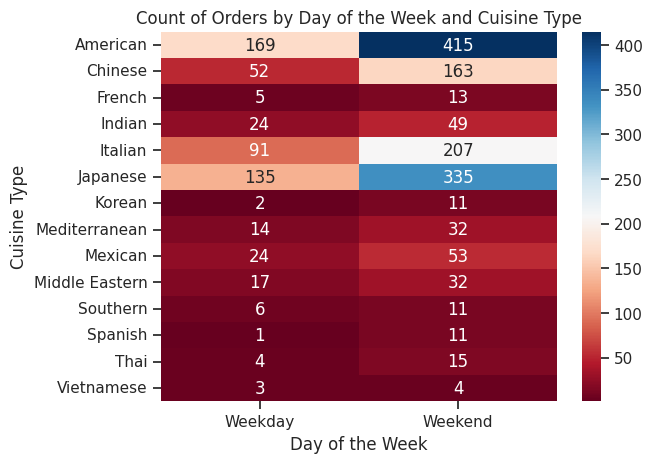

In [ ]:
# Heatmap of Order Count by Cuisine Type and Day of Week
pivot_table = df.pivot_table(index='cuisine_type', columns='day_of_the_week', values='order_id', aggfunc='count')
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="RdBu")
plt.title('Count of Orders by Day of the Week and Cuisine Type')
plt.xlabel('Day of the Week')
plt.ylabel('Cuisine Type')
plt.show()

Observations:


---

*    The correlation matrix shows that all variable relationships have correlation coefficients near 0, indicating no significant linear relationship or mutual influence among the variables.

*    This suggests that the variables are largely independent and do not exhibit strong directional associations with one another.

*    Weekend orders consistently surpass weekday orders across all cuisine types, indicating higher customer activity during weekends.

*    The highest order volumes are seen in American cuisine with 415 orders and Japanese cuisine with 335 orders, highlighting their strong weekend appeal and overall popularity.
---





---


**13.**The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.


---



In [ ]:
# Using filtered_rating dataframe to exclude not given ratings

# Dataframe containing restaurant names with their rating counts
restaurant_ratings = filtered_ratings.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

ratings_more_than_fifty = restaurant_ratings[restaurant_ratings['rating'] > 50]
ratings_more_than_fifty

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [ ]:
# Using filtered_rating dataframe to exclude not given ratings

restaurant_names = ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken']

# Filter dataFrame for the specified restaurants
filtered_restaurants = filtered_ratings[filtered_ratings['restaurant_name'].isin(restaurant_names)]

# Group by restaurant name and rating, and calculate the mean
mean_ratings = filtered_restaurants.groupby('restaurant_name')['rating'].mean().reset_index()

mean_ratings

,restaurant_name,rating
0,Blue Ribbon Fried Chicken,4.328125
1,Blue Ribbon Sushi,4.219178
2,Shake Shack,4.278195
3,The Meatball Shop,4.511905


Observations:


---


After filtering for restaurants with more than 50 ratings and an average rating above 4.0, the following establishments qualify for the offer:

*    Shake Shack

*    The Meatball Shop

*    Blue Ribbon Sushi

*    Blue Ribbon Fried Chicken

These restaurants demonstrate both high customer engagement and strong satisfaction, making them ideal candidates for targeted promotional offers.


---




**14.**The company charges the restaurant 25% on the orders having cost greater

---

than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.


---



In [ ]:
# Dataframes for orders greater than 5 and 20 dollars
greater_than_five = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] < 20)].copy()
greater_than_twenty = df[df['cost_of_the_order'] > 20].copy()

In [ ]:
# Creating column 'revenue' and applying respective functions for dataframes
greater_than_five.loc[:, 'revenue'] = greater_than_five['cost_of_the_order'] * 0.15
greater_than_twenty.loc[:, 'revenue'] = greater_than_twenty['cost_of_the_order'] * 0.25

In [ ]:
# Calculateing the total revenue
total_revenue = greater_than_twenty['revenue'].sum() + greater_than_five['revenue'].sum()

print("Net Revenue: $" + str(round(total_revenue, 2)))

Net Revenue: $6166.3


Observations:

---


The total net revenue generated across all orders is approximately $6,166.30, reflecting the cumulative value of completed transactions.


---





---


**15.**The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

---



In [ ]:
# Create new column 'total_time'
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Filter to get total times greater than 60 minutes
time_greater_sixty = df[df['total_time'] > 60]
time_greater_sixty

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
10,1477895,143926,Big Wong Restaurant ÂŒ_Â¤Â¾Ã‘Â¼,Chinese,5.92,Weekday,Not given,34,28,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,64
...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,62


In [ ]:
# Calculating percentage
time_percentage = (len(time_greater_sixty) / len(df)) * 100
print('Percentage of orders taking more than 60 minutes:', str(round(time_percentage, 2)) + '%')

Percentage of orders taking more than 60 minutes: 10.54%


Observations:


---


10.54% of orders took more than 60 minutes in total for both preparation and delivery, indicating a notable minority of extended service times.

---





---


**16.**The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?


---



In [ ]:
# Dataframes for Weekday and Weekend separately
filtered_weekdays = df[df['day_of_the_week'] == 'Weekday'].copy()
filtered_weekends = df[df['day_of_the_week'] == 'Weekend'].copy()

In [ ]:
# Calculate mean for each dataframe
mean_delivery_time_weekday = filtered_weekdays['delivery_time'].mean()
mean_delivery_time_weekend = filtered_weekends['delivery_time'].mean()

print('Mean delivery time for weekday:', str(round(mean_delivery_time_weekday, 2)), 'minutes')
print('Mean delivery time for weekend:', str(round(mean_delivery_time_weekend, 2)), 'minutes')

Mean delivery time for weekday: 28.34 minutes
Mean delivery time for weekend: 22.47 minutes


Observations:


---

*    The average delivery time is significantly higher on weekdays (28.34 minutes) compared to weekends (22.47 minutes).

*    This disparity may contribute to the higher volume of orders on weekends, as faster delivery times enhance customer convenience and satisfaction.


---



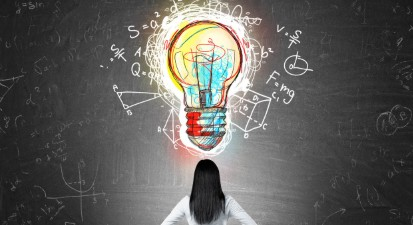



---


**17.**What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?


---





---


**Conclusions:**


---


*    Based on analysis of 1,898 order records across various cuisines and customers, the following key insights emerge:

*    Order volume is higher on weekends than weekdays, indicating greater customer engagement during weekends.

*    A notable portion of orders lack ratings, suggesting a need to improve feedback collection.

*    Most customers rate their orders positively, with the majority of ratings falling between 3 and 5.

*    American, Japanese, and Italian cuisines dominate in both order volume and customer ratings, confirming their popularity.

*    Top-performing restaurants include Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.

*    Shorter delivery times correlate with higher ratings, underscoring the importance of speed in customer satisfaction.

*    Right-skewed distributions in preparation and delivery times highlight operational inefficiencies worth addressing.


---


**Recommendations:**


---



*    Optimize delivery efficiency: As FoodHub’s revenue is margin-based, improving delivery times and managing cost per order will enhance customer satisfaction and drive repeat business.

*    Incentivize customer feedback: Offer small rewards or loyalty points to encourage more customers to rate their orders, improving data quality and engagement.

*    Leverage high-performing partners: Promote top-rated restaurants through featured listings or exclusive deals to attract new customers and maximize conversions.

*    Invest in data-driven operations: Continuously monitor metrics such as delivery times, customer feedback, and order trends to uncover actionable insights and optimize performance over time.

In [ ]:
# Installing Jupyter nbconvert tool to enable exporting notebooks to formats like HTML, PDF, or Markdown
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/FoodHub.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/FoodHub.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 2697843 bytes to /content/drive/MyDrive/Colab Notebooks/FoodHub.html
